# Hypothesis Testing
- how does it work?
  - https://measuringu.com/how-does-hypothesis-testing-work/
- example:
  - https://www.visual-design.net/post/an-interactive-guide-to-hypothesis-testing-in-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

- dataset in https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign?resource=download

In [ ]:
df = pd.read_csv("marketing_campaign.csv", sep=';')
# df = pd.read_csv("marketing_campaign.csv", sep='\t')

In [ ]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
df.shape

(2240, 29)

In [ ]:
sampled_df = df.sample(n=100, random_state=100)

## T-Test
- T-test is used when we want to test the relationship between a numeric variable and a categorical variable.
- I would like to test whether “Recency” (the number of days since customer’s last purchase - numeric value) contributes to the prediction of “Response” (whether the customer accepted the offer in the last campaign - categorical value), I can use a two sample t-test.
- That is, we want to **compare the mean of two sample groups**.

  - The first sample would be the “Recency” of customers who accepted the offer:
  - The second sample would be the “Recency” of  customers who rejected the offer:

In [ ]:
sampled_df.shape

(100, 29)

- recency: number of days since the last *purchase*

In [ ]:
recency_P = sampled_df[sampled_df['Response']==1]['Recency']
recency_N = sampled_df[sampled_df['Response']==0]['Recency']

In [ ]:
recency_P.shape, recency_N.shape  # series

((15,), (85,))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


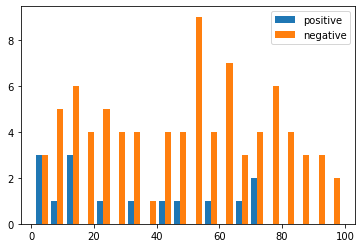

In [ ]:
plt.hist([recency_P, recency_N], bins=20)
plt.legend(["positive","negative"])

- Step1. define null and alternative hypothesis

  - null: there is no difference in Recency between the customers who accepted the offer in the last campaign and who did not accept the offer

- Step 2. choose the appropriate test

  - To test the difference between two independent samples, two-sample t-test is the most appropriate statistical test which follows student t-distribution.   

In [ ]:
from scipy.stats import t
df = 100 - 2   # 15-1 + 85-1
rv = t(df)

In [ ]:
t.ppf(0.01, df), t.ppf(0.99, df)   # alpha=0.01 (99% confidence interval)

(-2.3650024101176554, 2.365002410117655)

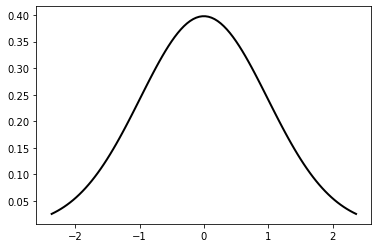

In [ ]:
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.show()

- Step 3. calculate the p-value

  - There are some handy functions in Python calculate the probability in a distribution. For any x covered in the range of the distribution,

In [ ]:
# two-sampled t-test
from scipy.stats import ttest_ind

In [ ]:
t_stat, pvalue = ttest_ind (recency_P, recency_N)
print(t_stat, pvalue)
if pvalue <= 0.05:
    print ("Reject H0. Therefore these two groups are related (not independent).")

-2.2792332995612146 0.024822208644980654
Reject H0. Therefore these two groups are related (not independent).


- Step 4. determine the statistical significance

  - The commonly used significance level threshold is 0.05. (**Reject H0**) Since p-value here (0.024) is smaller than 0.05, **we can say that it is statistically significant based on the collected sample.**
  - A lower Recency of customer who accepted the offer is likely not occur by chance.
  - *This indicates the feature “Response” may be a strong predictor of the target variable “Recency”.* And if we would perform feature selection for a model predicting the "Recency" value, "Response" is likely to have high importance.

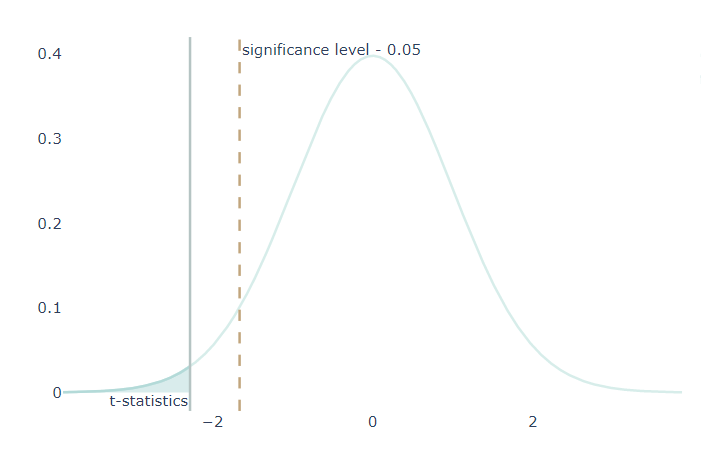

## ANOVA Test
- Now that we know t-test is used to compare the mean of one or two sample groups. What if we want to test more than two samples?  Use ANOVA test.
- ANOVA examines the difference among groups by calculating the ratio of variance across different groups vs variance within a group. Larger ratio indicates that the difference across groups is a result of the group difference rather than just random chance.
- As an example, let's use the feature “Kidhome” for the prediction of “NumWebPurchases”. There are three values of “Kidhome” - 0, 1, 2 which naturally forms three groups.

In [ ]:
kidhome_0 = sampled_df[sampled_df['Kidhome']==0]['NumWebPurchases']
kidhome_1 = sampled_df[sampled_df['Kidhome']==1]['NumWebPurchases']
kidhome_2 = sampled_df[sampled_df['Kidhome']==2]['NumWebPurchases']

In [ ]:
type(kidhome_0)

pandas.core.series.Series

In [ ]:
[len(i) for i in [kidhome_0, kidhome_1, kidhome_2]]

[55, 42, 3]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


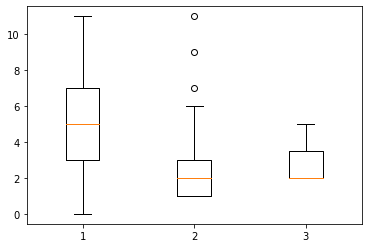

In [ ]:
plt.boxplot([kidhome_0, kidhome_1, kidhome_2])
plt.show()

- It appears there are distinct differences among three groups. So let’s carry out ANOVA test to prove if that’s the case.

- 1. define hypothesis:

  - null hypothesis: there is no difference among three groups

- 2. choose the appropriate test: ANOVA test for examining the relationships of numeric values against a categorical value with more than two groups.
  - Similar to t-test, the null hypothesis of ANOVA test also follows a distribution defined by degrees of freedom.
  - The degrees of freedom in ANOVA is determined by number of total samples (n) and the number of groups (k).
    - dfn = k - 1
    - dfd = n - k

In [ ]:
from scipy.stats import f, f_oneway
dfn = 3-1
dfd = 100-3
rv = f(dfn, dfd)

- 3. calculate the p-value:
  - To calculate the p-value of the f-statistics, we use the right tail cumulative area of the f-distribution, which is 1 - rv.cdf(x).

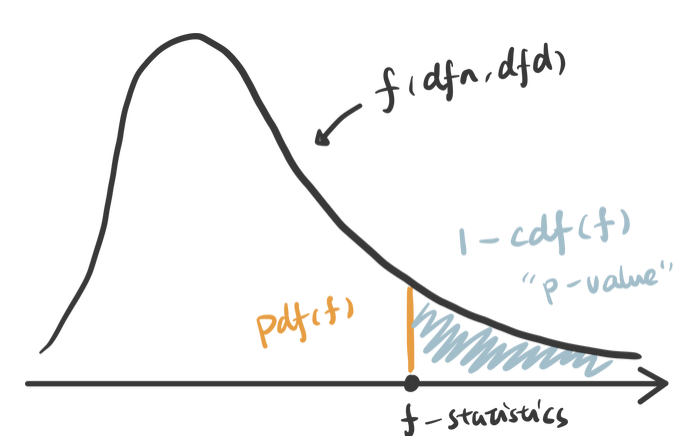

array([9.99900000e-01, 9.99798586e-01, 9.99697182e-01, ...,
       1.00016779e-04, 1.00008389e-04, 1.00000000e-04])

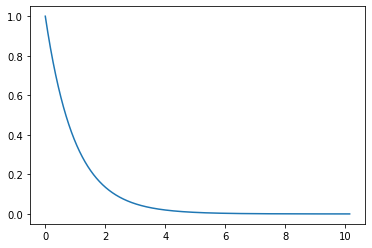

In [ ]:
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100000)
y = rv.pdf(x)
plt.plot(x,y)
pvalue = 1 - rv.cdf(x)
pvalue

- To easily get the f-statistics and p-value using Python, we can use the function stats.f_oneway() which returns p-value: 0.00040.

In [ ]:
f_stat, pvalue = f_oneway(kidhome_0, kidhome_1, kidhome_2)
f_stat, pvalue

(8.496139598178, 0.00039808004666969554)

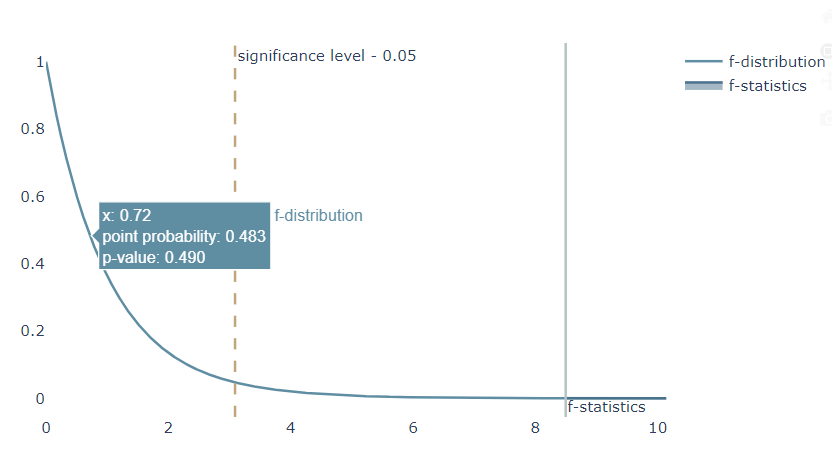

- 4. determine the statistical significance:
  - Compare the p-value against the significance level 0.05, we can infer that there is strong evidence against the null hypothesis and very likely that there is difference in “NumWebPurchases” between at least two groups.

## Chi-Squared Test
- Chi-Squared test is for testing the relationship between two categorical variables.
- The underlying principle is that if two categorical variables are independent, then one categorical variable should have similar composition when the other categorical variable change.
- Let’s look at the example of whether “Education” and “Response” are independent.

In [ ]:
ed_contingency = pd.crosstab(sampled_df['Education'], sampled_df['Response'])
ed_contingency.head()

Response     0  1
Education        
2n Cycle    13  3
Basic        2  0
Graduation  44  5
Master       9  4
PhD         17  3

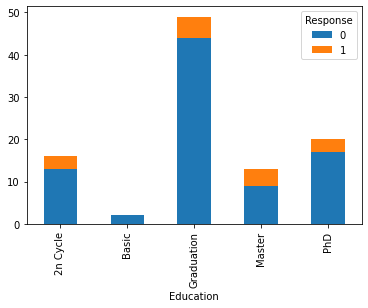

In [ ]:
ed_contingency.plot(kind='bar', stacked=True)

- If these two variables are completely independent to each other (null hypothesis is true), then the proportion of positive Response and negative Response should be the same across all Education groups.
- It seems like composition are slightly different, but is it significant enough to say there is dependency - let’s run a Chi-Squared test.

- 1. define hypothesis:
  - null hypothesis: “Education” and “Response” are independent to each other.

- 2. choose the appropriate test:
  - Chi-Squared test is chosen and you probably found a pattern here, that Chi-distribution is also determined by the degree of freedom which is (row - 1) x (column - 1).

In [ ]:
from scipy.stats import chi2, chi2_contingency
r = 5
c = 2
dof = (5-1) * (2-1)
rv = chi2(df= dof)

- 3. calculate the p-value: p value is calculated as the right tail cumulative area: 1 - rv.cdf(x).

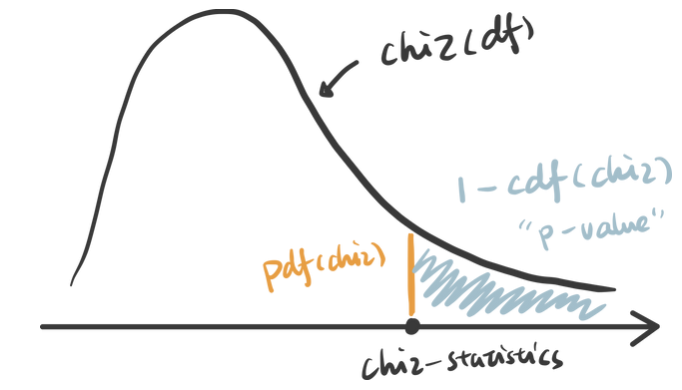

In [ ]:
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100000)
y = rv.pdf(x)
pvalue = 1 - rv.cdf(x)

In [ ]:
chi2_stat, pvalue, dof, exp = chi2_contingency(ed_contingency)
chi2_stat, pvalue, dof, exp

(3.9488102933481084, 0.4129779495497867, 4, array([[13.6 ,  2.4 ],
        [ 1.7 ,  0.3 ],
        [41.65,  7.35],
        [11.05,  1.95],
        [17.  ,  3.  ]]))

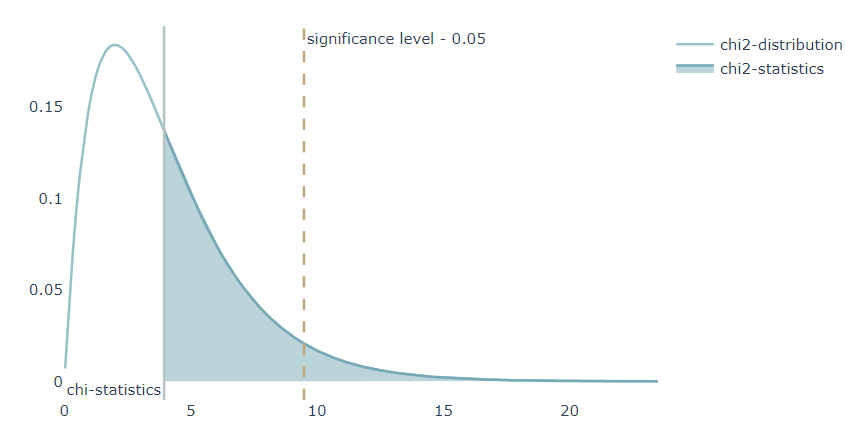

- 4. determine the statistical significance: the p-value here is 0.41, suggesting that it is not statistical significant. Therefore, we cannot reject the null hypothesis that these two categorical variables are independent. This further indicates that “Education” may not be a strong predictor of “Response”.

- we still have two important hypothesis tests.
  - z-test: test the difference between two categories of numeric variables - when sample size is LARGE
  - correlation: test the relationship between two numeric variables

# Levene Test for equality of variances
- https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e

- 1. Defining Hypotheses:
Please remember that H₀ and H₁ must be mutually exclusive, and H₁ shouldn’t contain equality:

  - H₀: μ=x, H₁: μ≠x
  - H₀: μ≤x, H₁: μ>x
  - H₀: μ≥x, H₁: μ<x

- 2. Assumption Check:
To decide whether to use the parametric or nonparametric version of the test, we should check the specific requirements listed below:

  - Observations in each sample are independent and identically distributed (IID).
  - Observations in each sample are normally distributed.
  - Observations in each sample have the same variance.

- 3. Selecting the Proper Test:
  - Then we select the appropriate test to be used. When choosing the proper test, it is essential to analyze how many groups are being compared and whether the data are paired or not. To determine whether the data is matched, it is necessary to consider whether the data was collected from the same individuals.

- 4. Decision and Conclusion
  - After performing the hypothesis testing, we obtain a related p-value that shows the significance of the test.

  - If the p-value is smaller than the alpha (the significance level), in other words, there is enough evidence to prove H₀ is not valid; you can reject H₀.     
  - Otherwise, you fail to reject H₀.
  - Please remember that rejecting H₀ validates H₁. However, failing to reject H₀ does not mean H₀ is valid, nor does it mean H₁ is wrong.

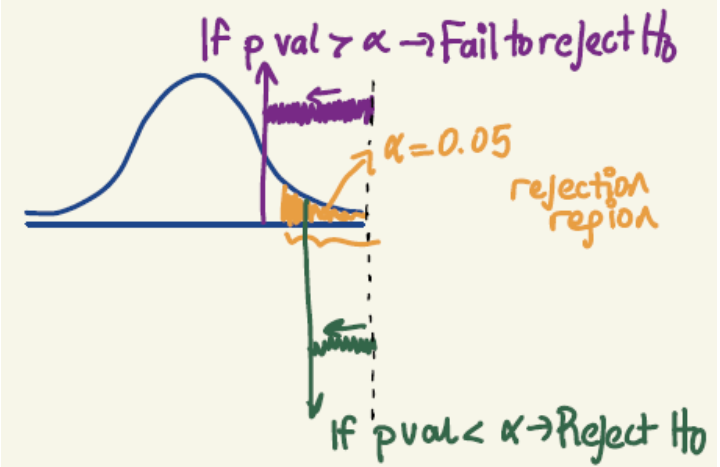

In [ ]:
# Perform Levene test for equal variances.
# - The Levene test tests the null hypothesis that all input samples are from
# populations with equal variances.
from scipy.stats import levene
a = [8.88, 9.12, 9.04, 8.98, 9.00, 9.08, 9.01, 8.85, 9.06, 8.99]
b = [8.88, 8.95, 9.29, 9.44, 9.15, 9.58, 8.36, 9.18, 8.67, 9.05]
c = [8.95, 9.12, 8.95, 8.85, 9.03, 8.84, 9.07, 8.98, 8.86, 8.98]
stat, p = levene(a, b, c)
p

0.002431505967249681

In [ ]:
aa = np.array(a)
((aa - aa.mean())**2).mean()   # variance

0.006348999999999971

In [ ]:
[np.var(x, ddof=0) for x in [a, b, c]]   # ddof - delta degrees of freedom

[0.006348999999999971, 0.11766499999999999, 0.008001000000000003]

In [ ]:
[i**2 for i in [np.std(x) for x in [a, b, c]]]

[0.006348999999999971, 0.11766499999999999, 0.008001000000000003]

In [ ]:
[np.var(x, ddof=1) for x in [a, b, c]]

[0.007054444444444413, 0.13073888888888888, 0.008890000000000002]

- The small p-value suggests that the populations do not have equal variances.

- This is not surprising, given that the sample variance of b is much larger than that of a and c:

https://github.com/eceisik/eip/blob/main/hypothesis_testing_examples.ipynb

# Exercie

- random sampling

In [ ]:
import numpy as np

N = 10000
mu, std = 10, 2

population_df = np.random.normal(mu,std,N)

# function that creates random sample
def random_sampling(df, n):
    random_sample = np.random.choice(df,replace = False, size = n)
    return(random_sample)

In [ ]:
sample1 = random_sampling(population_df, 30)
sample1

array([ 8.19048661, 13.82372943,  9.56346278,  7.0675638 , 10.57398855,
       13.52719024, 10.24399807, 11.30473919,  8.86331388, 10.42824231,
       11.25656734,  8.96739376,  7.64045452, 13.54739637,  6.67919868,
        8.56610882, 10.69462986, 10.11028735, 11.06022587, 10.44532959,
       11.45169593, 10.57838877,  6.98074349, 11.16310267,  9.08759996,
        7.87146292,  7.90207795, 10.59976648, 10.99817792, 12.03230121])

In [ ]:
population_df.mean(), population_df.var()

(10.011780686736119, 3.8828442069875937)

In [ ]:
((population_df - population_df.mean())**2).sum()/N

3.8828442069875937

In [ ]:
sample1.mean(), sample1.var()

(10.040654143129697, 3.5500746520128525)

In [ ]:
((sample1 - sample1.mean())**2).sum()/30

3.5500746520128525